In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.options.display.max_columns = 999
pd.set_option('display.precision', 2)
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv("../src/data.csv", index_col=0)

In [ ]:
df.columns = ['ID', 'room_count', 'type', 'metro', 'address',
       'apartment_sqm', 'house_type', 'parking', 'price', 'tel', 'description',
       'furnish', 'rooms_sqm', 'balcony', 'windows', 'toilets',
       'kids_pets', 'extra', 'house_name',
       'house_series', 'ceiling_height', 'elevator', 'waste_chute',
       'link']

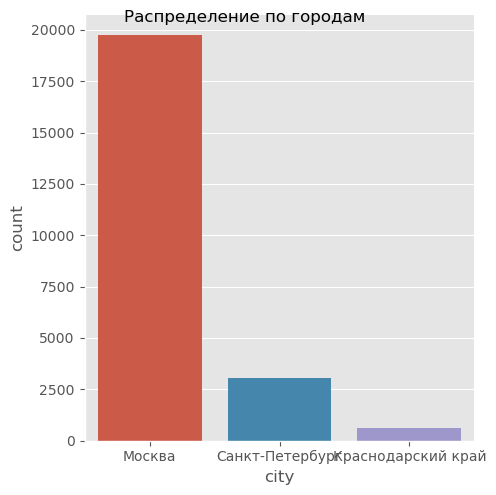

In [ ]:
moscow = df[df['address'].str.startswith('Москва', na=False)].reset_index()
spb = df[df['address'].str.startswith('Санкт-Петербург', na=False)].reset_index()
krasnodar = df[df['address'].str.startswith('Краснодарский край', na=False)].reset_index()


count = pd.DataFrame({
    'city': ['Москва', 'Санкт-Петербург', 'Краснодарский край'],
    'count': [moscow.index.max(), spb.index.max(), krasnodar.index.max()]
})
g = sns.catplot(data=count, x='city', y='count', kind='bar', hue='city')
g.fig.suptitle('Распределение по городам');

### Убираем все кроме мск

In [ ]:
df = df[df['address'].str.startswith('Москва', na=False)].reset_index(drop=True)

Попробовать вывести все строки

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19737 entries, 0 to 19736
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              19737 non-null  int64  
 1   room_count      19202 non-null  object 
 2   type            19737 non-null  object 
 3   metro           19391 non-null  object 
 4   address         19737 non-null  object 
 5   apartment_sqm   19737 non-null  object 
 6   house_type      19737 non-null  object 
 7   parking         8563 non-null   object 
 8   price           19737 non-null  object 
 9   tel             19737 non-null  object 
 10  description     19737 non-null  object 
 11  furnish         17274 non-null  object 
 12  rooms_sqm       12509 non-null  object 
 13  balcony         13107 non-null  object 
 14  windows         14587 non-null  object 
 15  toilets         17696 non-null  object 
 16  kids_pets       14822 non-null  object 
 17  extra           19465 non-null 

In [ ]:
print(df.columns.tolist())

['ID', 'room_count', 'type', 'metro', 'address', 'apartment_sqm', 'house_type', 'parking', 'price', 'tel', 'description', 'furnish', 'rooms_sqm', 'balcony', 'windows', 'toilets', 'kids_pets', 'extra', 'house_name', 'house_series', 'ceiling_height', 'elevator', 'waste_chute', 'link']


## Дать пояснения к каждой функции ниже

In [ ]:
def convert_price(n):
    x = n.split()
    if '$' in x[1]:
        return float(x[0])*90
    if '€' in n.split()[1]:
        return float(x[0])*100
    else:
        return float(x[0])

df['price_cleaned'] = df['price'].map(convert_price)

In [ ]:
def get_total_floors(x):
    if isinstance(x, str):
        return int(x.split('/')[1].split(',')[0])
    return x

def get_floor(x):
    if isinstance(x, str):
        return int(x.split('/')[0])
    return x

def get_house_type(x):
    if isinstance(x, str):
        try:
            return x.split('/')[1].split(', ')[1]
        except:
            return np.nan
    return x

df['floor'] = df['house_type'].map(get_floor)
df['total_floors'] = df['house_type'].map(get_total_floors)
df['house_type'] = df['house_type'].map(get_house_type)

In [ ]:
df.apartment_sqm = df.apartment_sqm.map(lambda x: float(x.split('/')[0]))

In [ ]:
def get_mins_from_metro(x):
    try:
        mins = x.split('(')[1].split(' ')[0]
        if x.split('мин ')[1] == 'на машине)':
            return int(mins)*4
        return int(mins)
    except:
        return np.nan

def fix_metro(x):
    if isinstance(x, str):
        return x.split(' (')[0]
    return x

df['mins_from_metro'] = df['metro'].map(get_mins_from_metro)
df['metro'] = df['metro'].map(fix_metro)

In [ ]:
def fix_rooms(x):
    if isinstance(x, str):
        return x.split(',')[0]
    return x

df.room_count = df.room_count.map(fix_rooms)
df['room_count'] = df['room_count'].astype(float)

In [ ]:
def get_balconies(x):
    if isinstance(x, str):
        return x.split('(')[1].split(')')[0]
    return x

df.balcony = df.balcony.map(get_balconies)
df['balcony'] = df['balcony'].astype(float)

In [ ]:
def check_jk(x):
    if str(x) == 'nan':
        return False
    else:
        return True

df['is_jk'] = df.house_name.map(check_jk)
df['is_jk'] = df['is_jk'].astype(bool)

In [ ]:
import re

def count_toilets_els(x):
    if isinstance(x, str):
        numbers = re.findall(r'\d+', x)
        return sum(map(int, numbers)) if numbers else np.nan
    return np.nan


df['toilet_count'] = df['toilets'].map(count_toilets_els)
df['elevator'] = df['elevator'].map(count_toilets_els)

In [ ]:
def get_ug_parking(x):
    if isinstance(x, str) and x == 'подземная':
        return True
    else:
        return False

df['ug_parking'] = df['parking'].map(get_ug_parking)

In [ ]:
df['street'] = df['address'].map(lambda x: x.split(',')[1])

In [ ]:
only_nums = df[['room_count', 'apartment_sqm', 'ceiling_height', 'price_cleaned', 'mins_from_metro', 'toilet_count', 'total_floors', 'floor']]
lim_cats = df[['furnish', 'windows', 'waste_chute', 'kids_pets', 'house_type', 'parking']]

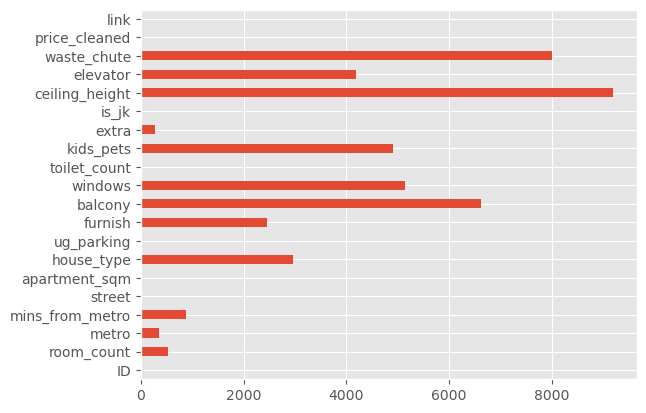

In [85]:
df.isna().sum().plot(kind='barh');

Какие столбцы есть в наборе данных:

In [ ]:
df.columns

Index(['ID', 'room_count', 'type', 'metro', 'address', 'apartment_sqm',
       'house_type', 'parking', 'price', 'tel', 'description', 'furnish',
       'rooms_sqm', 'balcony', 'windows', 'toilets', 'kids_pets', 'extra',
       'house_name', 'house_series', 'ceiling_height', 'elevator',
       'waste_chute', 'link', 'price_cleaned', 'floor', 'total_floors',
       'mins_from_metro', 'is_jk', 'toilet_count', 'ug_parking', 'street'],
      dtype='object')

### Разобрать extras (мб оставить только "мебель в комнатах")

In [ ]:
df['waste_chute'].value_counts()

waste_chute
Да     10262
Нет     1468
Name: count, dtype: int64

In [ ]:
df.waste_chute.isna().sum()

np.int64(8007)

In [ ]:
df = df[['ID', 'room_count', 'metro', 'mins_from_metro', 'street',
       'apartment_sqm', 'house_type', 'ug_parking',
       'furnish', 'balcony', 'windows', 'toilet_count', 'kids_pets',
       'extra', 'is_jk', 'ceiling_height', 'elevator',
       'waste_chute', 'price_cleaned','link']]

In [ ]:
df[['price_cleaned', 'ug_parking']].corr()

,price_cleaned,ug_parking
price_cleaned,1.00,0.25
ug_parking,0.25,1.00


#### Добавить проверку "на машине" или "пешком" от метро

# Заполняем пропуски

In [ ]:
df['toilet_count'] = df['toilet_count'].fillna(1)

In [87]:
df['room_count'] = df['room_count'].fillna(1)

In [89]:
df['furnish'] = df['furnish'].fillna('Без ремонта')

In [91]:
# df['parking'] = df['parking'].replace(to_replace ='открытая', value = 'наземная хаотичная')
# df['parking'] = df['parking'].replace(to_replace ='наземная', value = 'платная во дворе')
# df['parking'] = df['parking'].fillna('наземная хаотичная')

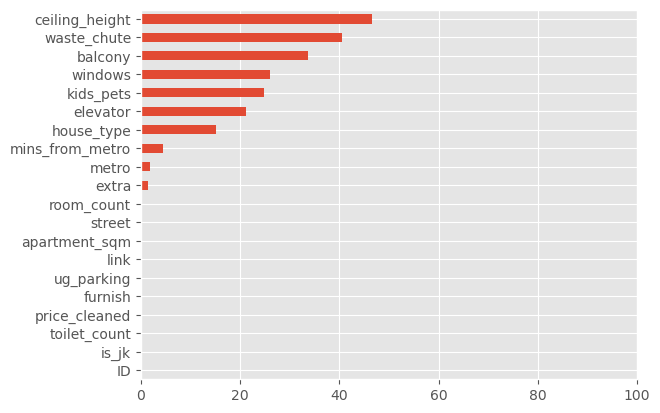

In [97]:
(df.isna().sum() / len(df) * 100) \
    .sort_values(ascending=True) \
    .plot(kind='barh')
plt.xlim(0, 100);